In [1]:
from google.colab import files
uploaded = files.upload()

Saving full_data.csv to full_data.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("full_data.csv")
df.head()

,type,total_price,carat,price_per_carat,color,shape,length,width,height,clarity,cut,color_intensity,origin,treatment,cut_quality
0,Blue Sapphire,902,0.82,1100.0,Blue,Princess,7.00,7.00,4.21,Very Slightly Included,Princess Cut,Vivid,Thailand,Heated,Good
1,Blue Sapphire,1008,0.84,1200.0,Greyish Blue,Pear,7.33,4.84,3.57,Very Slightly Included,Mixed Brilliant,Medium,Montana,No Enhancement,Excellent
2,Blue Sapphire,1290,1.29,1000.0,Bluish Grey,Cushion,6.86,5.74,3.99,Slightly Included,Mixed Brilliant,Medium Light,Montana,Heated,Good
3,Blue Sapphire,3743,2.13,1757.0,Blue,Princess,7.17,7.13,4.10,Eye Clean,Step Cut,Vivid,Thailand,Heated,Good
4,Blue Sapphire,2314,1.78,1300.0,Greyish Blue,Cushion,8.37,6.48,3.68,Very Slightly Included,Mixed Brilliant,Intense,Montana,No Enhancement,Good


In [27]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split

data = df.drop(['length', 'width', 'height'], axis='columns')
X = df[['carat','price_per_carat', 'color', 'shape', 'clarity', 'cut', 'color_intensity', 'origin', 'treatment', 'type', 'cut_quality']]
y = df['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Handle target
shape_means = X_train.groupby('shape')['price_per_carat'].mean()
origin_means = X_train.groupby('origin')['price_per_carat'].mean()
color_means = X_train.groupby('color')['price_per_carat'].mean()
color_intensity_means = X_train.groupby('color_intensity')['price_per_carat'].mean()
clarity_means = X_train.groupby('clarity')['price_per_carat'].mean()
treatment_means = X_train.groupby('treatment')['price_per_carat'].mean()
cut_means = X_train.groupby('cut')['price_per_carat'].mean()
type_means = X_train.groupby('type')['price_per_carat'].mean()
cut_quality_means = X_train.groupby('cut_quality')['price_per_carat'].mean()

# Map target encoding to the training data
X_train['shape_encoded'] = X_train['shape'].map(shape_means)
X_train['origin_encoded'] = X_train['origin'].map(origin_means)
X_train['color_encoded'] = X_train['color'].map(color_means)
X_train['color_intensity_encoded'] = X_train['color_intensity'].map(color_intensity_means)
X_train['clarity_encoded'] = X_train['clarity'].map(clarity_means)
X_train['cut_encoded'] = X_train['cut'].map(cut_means)
X_train['treatment_encoded'] = X_train['treatment'].map(treatment_means)
X_train['type_encoded'] = X_train['type'].map(type_means)
X_train['cut_quality_encoded'] = X_train['cut_quality'].map(cut_quality_means)

# Map target encoding to the test data
# Handle unseen categories by filling with global mean
global_mean = X_train['price_per_carat'].mean()
X_test['shape_encoded'] = X_test['shape'].map(shape_means).fillna(global_mean)
X_test['origin_encoded'] = X_test['origin'].map(origin_means).fillna(global_mean)
X_test['color_encoded'] = X_test['color'].map(color_means).fillna(global_mean)
X_test['color_intensity_encoded'] = X_test['color_intensity'].map(color_intensity_means).fillna(global_mean)
X_test['clarity_encoded'] = X_test['clarity'].map(clarity_means).fillna(global_mean)
X_test['cut_encoded'] = X_test['cut'].map(cut_means).fillna(global_mean)
X_test['treatment_encoded'] = X_test['treatment'].map(treatment_means).fillna(global_mean)
X_test['type_encoded'] = X_test['type'].map(type_means).fillna(global_mean)
X_test['cut_quality_encoded'] = X_test['cut_quality'].map(cut_quality_means).fillna(global_mean)


print(X_train.dtypes)
X_train = X_train.drop(columns=['price_per_carat', 'color', 'shape', 'color_intensity', 'origin', 'cut', 'treatment', 'clarity', 'type', 'cut_quality'])
X_test = X_test.drop(columns=['price_per_carat', 'color', 'shape', 'color_intensity', 'origin', 'cut', 'treatment', 'clarity', 'type', 'cut_quality'])

from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

carat                      float64
price_per_carat            float64
color                       object
shape                       object
clarity                     object
cut                         object
color_intensity             object
origin                      object
treatment                   object
type                        object
cut_quality                 object
shape_encoded              float64
origin_encoded             float64
color_encoded              float64
color_intensity_encoded    float64
clarity_encoded            float64
cut_encoded                float64
treatment_encoded          float64
type_encoded               float64
cut_quality_encoded        float64
dtype: object


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Linear Regression model
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_predict_linReg = linReg.predict(X_test)


# Predicting the accuracy score for Log Regression
score=r2_score(y_test, y_predict_linReg)
print('-------Linear Regression Model-------')
print('r2_score is', score)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict_linReg))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict_linReg)))

-------Linear Regression Model-------
r2_score is 0.3957959214094534
mean_squared_error is== 647868280.7415828
root_mean_squared_error is== 25453.256780647596


In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Predicting the accuracy score for Decision Tree Classifier
score=r2_score(y_test, y_predict)
print('-------Decision Tree Classifier-------')
print('r2_score is', score)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict)))

-------Decision Tree Classifier-------
r2_score is 0.1924170842220162
mean_squared_error is== 865944758.9659864
root_mean_squared_error is== 29426.939340780693


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
670 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title("Feature Importance from Random Forest")
plt.show()



# Predicting the accuracy score for Random Forest Regressor
score=r2_score(y_test, y_predict)
score_train = r2_score(y_train, y_predict_train)
print('-------Random Forest Regressor-------')
print('r2_score for test is', score)
print('r2_score for train is', score_train)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict)))

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

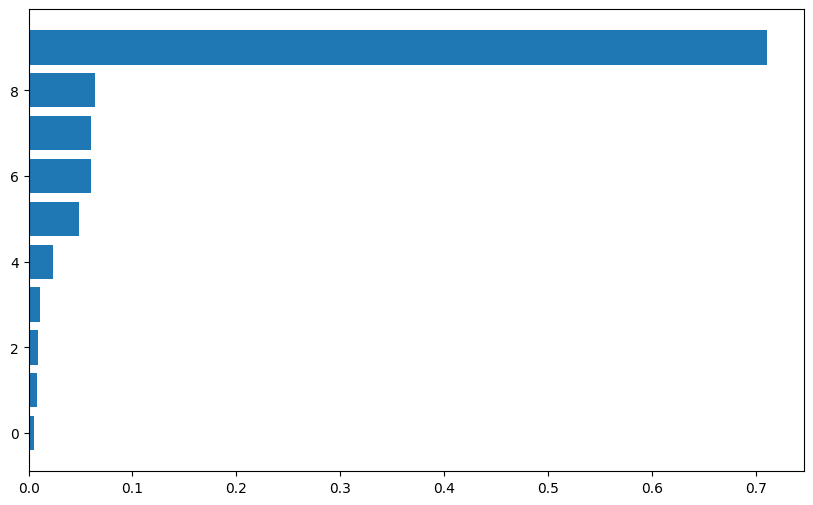

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd


model = RandomForestRegressor(random_state=42, n_estimators=50)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title("Feature Importance from Random Forest")
plt.show()



# Predicting the accuracy score for Random Forest Regressor
score=r2_score(y_test, y_predict)
score_train = r2_score(y_train, y_predict_train)
print('-------Random Forest Regressor-------')
print('r2_score for test is', score)
print('r2_score for train is', score_train)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict)))

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=70)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Predicting the accuracy score for Random Forest Regressor
score=r2_score(y_test, y_predict)
score_train = r2_score(y_train, y_predict_train)
print('-------Random Forest Regressor-------')
print('r2_score for test is', score)
print('r2_score for train is', score_train)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict)))

-------Random Forest Regressor-------
r2_score for test is 0.8055674705176449
r2_score for train is 0.9969307780265808
mean_squared_error is== 208483644.94628784
root_mean_squared_error is== 14438.962737893877


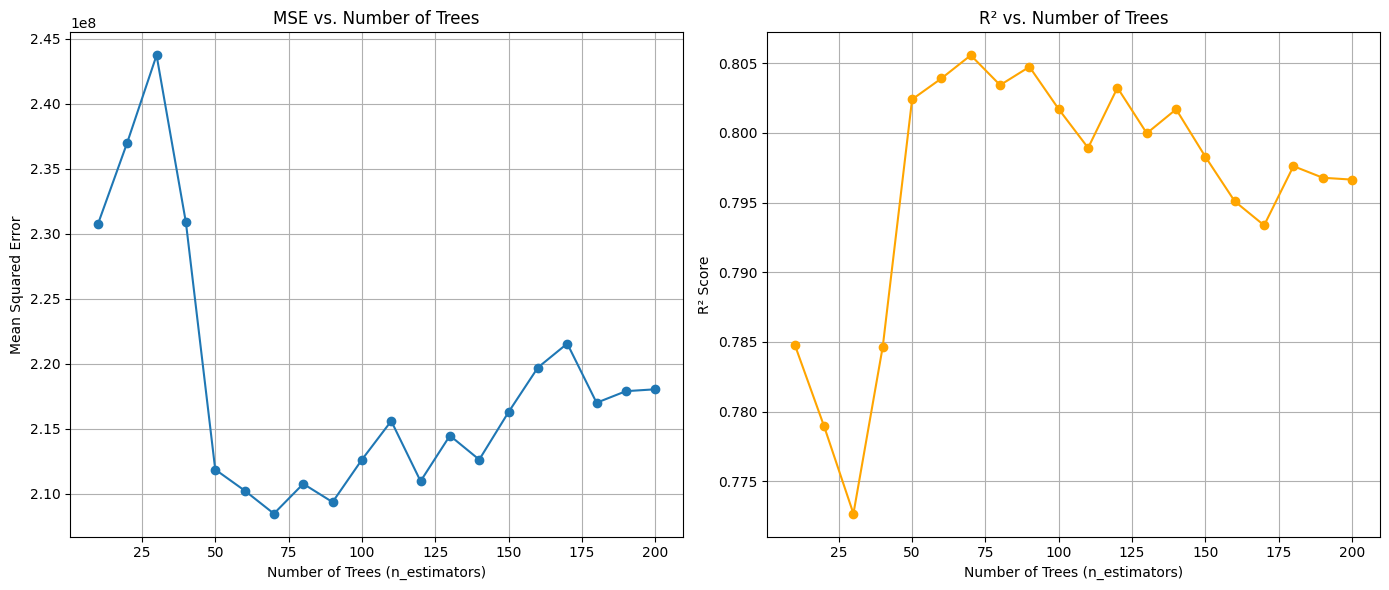

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize arrays to store results
n_estimators_range = range(10, 201, 10)
mse_values = []
r2_scores = []

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    mse_values.append(mse)
    r2_scores.append(r2)

# Plotting MSE and R² scores
plt.figure(figsize=(14, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('MSE vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o', color='orange')
plt.title('R² vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [29]:
from xgboost import XGBRegressor
import xgboost
model = XGBRegressor()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

# Predicting the accuracy score for Gradient Booster
score=r2_score(y_test, y_predict)
score_train = r2_score(y_train, y_predict_train)
print('-------Gradient Booster-------')
print('r2_score is', score)
print('r2_score for training is', score_train)
print('mean_squared_error is==', mean_squared_error(y_test,y_predict))
print('root_mean_squared_error is==',np.sqrt(mean_squared_error(y_test, y_predict)))

-------Gradient Booster-------
r2_score is 0.8143033385276794
r2_score for training is 0.9969307780265808
mean_squared_error is== 199116448.0
root_mean_squared_error is== 14110.862765968635


In [35]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib
%matplotlib inline

objective = "reg:linear"
seed = 100
n_estimators = 100
learning_rate = 0.1
gamma = 0.1
subsample = 0.8
colsample_bytree = 0.8
reg_alpha = 1
reg_lambda = 1
silent = False

parameters = {}
parameters['objective'] = objective
parameters['seed'] = seed
parameters['n_estimators'] = n_estimators
parameters['learning_rate'] = learning_rate
parameters['gamma'] = gamma
parameters['colsample_bytree'] = colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['silent'] = silent

scores = []

cv_params = {'max_depth': [2,4,6,8],
             'min_child_weight': [1,3,5,7]
            }
gbm = GridSearchCV(xgb.XGBRegressor(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        silent = silent

                                    ),

                    param_grid = cv_params,
                    scoring = "neg_mean_squared_error",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train,y_train)
print(gbm.cv_results)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'